### Study of Optimal City

In [1]:
__author__='Enrique Sanz Gonzalez'

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pylab as plt
#import seaborn
%matplotlib inline

In [3]:
MSA = pd.read_excel('data/Data.xls', header = 0)

In [4]:
MSA.head()

,State,County,Pop 2000,Total,Unnamed: 4,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Unknown,Nonroad,Transport,Total area sq miles,Density per square mile of land area
0,AL,Autauga County,43671,0.256167,NaN,0.068712,0.101527,0.232385,3.560907,1.711907,0.0,0.022345,0.056167,0.111879,1.902298,604.45,73.3
1,AL,Baldwin County,140415,0.450031,NaN,0.109306,0.084633,0.227529,0.000000,1.984894,0.0,0.127067,0.319406,0.352174,2.783541,2026.93,88.0
2,AL,Barbour County,29038,0.099370,NaN,0.065589,0.294630,0.216390,0.000000,1.967854,0.0,0.188338,0.473422,0.215856,2.845471,904.52,32.8
3,AL,Bibb County,20826,0.045945,NaN,0.036914,0.077886,0.221569,0.000000,1.716397,0.0,0.018259,0.045897,0.089217,1.869771,626.16,33.4
4,AL,Blount County,51024,0.114776,NaN,0.038245,0.177553,0.218762,0.000000,1.712934,0.0,0.005841,0.014682,0.081440,1.814896,650.60,79.0


In [5]:
MSA = MSA.iloc[:,:]
MSA = MSA.drop('Unnamed: 4', axis = 1)

In [6]:
MSA['County_State'] = MSA.County + ', ' + MSA.State

In [7]:
CODES = pd.read_csv('data/MSA_codes.csv')

In [8]:
codes = CODES.drop('Unnamed: 0', axis = 1)

In [9]:
table = pd.merge(codes,MSA, on = 'County_State', how = 'outer')

C:\Users\enrique\Anaconda2\lib\site-packages\pandas\tools\merge.py:714: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


In [10]:
table.head()

,MSA,Code,County_State,State,County,Pop 2000,Total,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Unknown,Nonroad,Transport,Total area sq miles,Density per square mile of land area
0,10180.0,48059.0,"Callahan County, TX",TX,Callahan County,12905.0,0.076143,0.035945,0.459007,0.106726,0.000000,5.131942,0.0,0.000000,0.000000,0.166620,5.298563,1276.33,370.1
1,10180.0,48253.0,"Jones County, TX",TX,Jones County,20785.0,0.191232,0.052065,0.028744,0.086624,6.689065,1.775457,0.0,0.057850,0.145415,0.365256,2.343978,753.58,20.6
2,10180.0,48441.0,"Taylor County, TX",TX,Taylor County,126555.0,0.382555,0.176507,0.122232,0.216701,0.000000,1.970745,0.0,0.119326,0.299949,0.117378,2.507398,2357.75,0.5
3,10380.0,72003.0,"Aguada Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10380.0,72005.0,"Aguadilla Municipio, PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
table = table.dropna()

In [12]:
table.head()

,MSA,Code,County_State,State,County,Pop 2000,Total,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Unknown,Nonroad,Transport,Total area sq miles,Density per square mile of land area
0,10180.0,48059.0,"Callahan County, TX",TX,Callahan County,12905.0,0.076143,0.035945,0.459007,0.106726,0.000000,5.131942,0.0,0.000000,0.000000,0.166620,5.298563,1276.33,370.1
1,10180.0,48253.0,"Jones County, TX",TX,Jones County,20785.0,0.191232,0.052065,0.028744,0.086624,6.689065,1.775457,0.0,0.057850,0.145415,0.365256,2.343978,753.58,20.6
2,10180.0,48441.0,"Taylor County, TX",TX,Taylor County,126555.0,0.382555,0.176507,0.122232,0.216701,0.000000,1.970745,0.0,0.119326,0.299949,0.117378,2.507398,2357.75,0.5
10,10420.0,39133.0,"Portage County, OH",OH,Portage County,152061.0,0.481948,0.218311,0.292481,0.556089,0.000000,1.893560,0.0,0.008256,0.020753,0.179986,2.102555,426.33,99.7
11,10420.0,39153.0,"Summit County, OH",OH,Summit County,542899.0,1.566309,0.230575,0.515684,0.581992,0.000000,1.247158,0.0,0.055781,0.140216,0.113678,1.556833,634.72,365.2


In [13]:
table.Total = table.Total*1000000

In [14]:
MSAs = table.groupby(by = 'MSA').sum()

In [15]:
MSAs.head()

,Code,Pop 2000,Total,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Unknown,Nonroad,Transport,Total area sq miles,Density per square mile of land area
MSA,,,,,,,,,,,,,,,
10180.0,144753.0,160245.0,6.499298e+05,0.264517,0.609983,0.410050,6.689065,8.878144,0.000000,0.177176,0.445364,0.649255,10.149939,4387.66,391.2
10420.0,78286.0,694960.0,2.048257e+06,0.448886,0.808165,1.138082,0.000000,3.140719,0.000000,0.064037,0.160969,0.293664,3.659388,1061.05,464.9
10500.0,65873.0,157833.0,9.775215e+05,0.312726,5.299540,0.721335,1.923182,10.254062,0.000000,0.322680,0.811117,1.314830,12.702689,6709.06,869.0
10580.0,180363.0,825875.0,2.816506e+06,1.095194,1.013204,2.584165,1.403509,8.119883,0.808433,0.186385,0.468514,0.619370,9.394151,2315.12,8456.8
10740.0,140162.0,729649.0,2.265461e+06,0.659015,1.950239,1.528412,0.424613,10.309857,0.072396,0.134789,0.338817,0.412407,11.195870,16831.39,584.9


In [16]:
MSAs = MSAs.reset_index()

In [17]:
MSAs.head()

,MSA,Code,Pop 2000,Total,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Unknown,Nonroad,Transport,Total area sq miles,Density per square mile of land area
0,10180.0,144753.0,160245.0,6.499298e+05,0.264517,0.609983,0.410050,6.689065,8.878144,0.000000,0.177176,0.445364,0.649255,10.149939,4387.66,391.2
1,10420.0,78286.0,694960.0,2.048257e+06,0.448886,0.808165,1.138082,0.000000,3.140719,0.000000,0.064037,0.160969,0.293664,3.659388,1061.05,464.9
2,10500.0,65873.0,157833.0,9.775215e+05,0.312726,5.299540,0.721335,1.923182,10.254062,0.000000,0.322680,0.811117,1.314830,12.702689,6709.06,869.0
3,10580.0,180363.0,825875.0,2.816506e+06,1.095194,1.013204,2.584165,1.403509,8.119883,0.808433,0.186385,0.468514,0.619370,9.394151,2315.12,8456.8
4,10740.0,140162.0,729649.0,2.265461e+06,0.659015,1.950239,1.528412,0.424613,10.309857,0.072396,0.134789,0.338817,0.412407,11.195870,16831.39,584.9


In [18]:
SMA_Name = pd.read_csv('data/SMA_codes_Names.csv').iloc[:,1:]
SMA_Name.MSA = SMA_Name.MSA*10.0

In [19]:
MSA_total = pd.merge(MSAs,SMA_Name, on = 'MSA')
MSA_red = MSA_total [MSA_total['Pop 2000']>100000]

In [20]:
#MSA_red = MSA_red[[u'MSA', u'Code', u'Pop 2000',
                                      #u'Total',
                                                        #u'Total area sq miles',
       #u'Density per square mile of land area',
                                   #u'MSA_Name']]

In [22]:
# normalizar

In [23]:
MSA_red_norm = pd.DataFrame(columns=MSA_red.columns)
MSA_red_norm['Pop 2000'] = MSA_red['Pop 2000']
MSA_red_norm['MSA Code'] = MSA_red['MSA']
MSA_red_norm['Area'] = MSA_red['Total area sq miles']
MSA_red_norm['MSA_Name'] = MSA_red['MSA_Name']
MSA_red_norm['Density'] = MSA_red['Density per square mile of land area']
MSA_red_norm['Total'] = MSA_red['Total']/MSA_red['Pop 2000']
MSA_red_norm.head(2)

,MSA,Code,Pop 2000,Total,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Unknown,Nonroad,Transport,Total area sq miles,Density per square mile of land area,MSA_Name,MSA Code,Area,Density
0,NaN,NaN,160245.0,4.055850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Abilene, TX Metropolitan Sta...",10180.0,4387.66,391.2
1,NaN,NaN,694960.0,2.947302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Akron, OH Metropolitan Stati...",10420.0,1061.05,464.9


In [24]:
MSA_ascend = MSA_red_norm.sort_values('Total', ascending =False)
MSA_descend = MSA_red_norm.sort_values('Total')

In [25]:
MSA_ascend_red = MSA_ascend [[ u'MSA', u'Code', u'Pop 2000', u'Total',u'MSA_Name']] 

# creation of the table Population against total Carbon E

In [26]:
MSA_ascend_red.head()

,MSA,Code,Pop 2000,Total,MSA_Name
319,NaN,NaN,132008.0,50.928439,"Weirton-Steubenville, WV-OH ..."
104,NaN,NaN,116320.0,48.419627,"Flagstaff, AZ Metropolitan S..."
238,NaN,NaN,107341.0,47.218939,"Pine Bluff, AR Metropolitan ..."
208,NaN,NaN,145945.0,36.631145,"Monroe, MI Metropolitan Stat..."
100,NaN,NaN,342815.0,36.033682,"Evansville, IN-KY Metropolit..."


In [27]:
MSA_ascend_red.to_csv('Tabla.csv')

In [28]:
MSA_descend_red = MSA_descend [[ u'MSA', u'Code', u'Pop 2000', u'Total',u'MSA_Name']] 
MSA_descend_red = MSA_descend [[ u'MSA', u'Code', u'Pop 2000', u'Total',u'MSA_Name']] 

In [29]:
MSA_descend_red.head(10)

,MSA,Code,Pop 2000,Total,MSA_Name
151,NaN,NaN,150355.0,1.655049,"Jacksonville, NC Metropolita..."
43,NaN,NaN,231969.0,1.663095,"Bremerton-Silverdale, WA Met..."
45,NaN,NaN,335227.0,1.757551,"Brownsville-Harlingen, TX Me..."
62,NaN,NaN,203171.0,1.907964,"Chico, CA Metropolitan Stati..."
329,NaN,NaN,222581.0,1.920533,"Yakima, WA Metropolitan Stat..."
154,NaN,NaN,181607.0,2.009250,"Johnson City, TN Metropolita..."
162,NaN,NaN,330714.0,2.019096,"Killeen-Temple-Fort Hood, TX..."
125,NaN,NaN,152772.0,2.042636,"Greenville, NC Metropolitan ..."
102,NaN,NaN,336609.0,2.098708,"Fayetteville, NC Metropolita..."
174,NaN,NaN,193117.0,2.109183,"Laredo, TX Metropolitan Stat..."


## Step 2 : Ranking Cities

In [30]:
MSA_top = MSA_ascend_red
MSA_top.columns = ['MSA Code', 'Code' ,'Population' ,'Total Carbon Emissions', 'Name of MSAs']

In [31]:
MSA_top = MSA_top[['MSA Code', 'Population' ,'Total Carbon Emissions', 'Name of MSAs']].head(10).reset_index()

In [32]:
# MSA_top  #tabla para imprimir ranking

In [33]:
MSA_least = MSA_descend_red
MSA_least.columns = ['MSA Code', 'Code' ,'Population' ,'Total Carbon Emissions', 'Name of MSAs']

In [34]:
MSA_least = MSA_least[['MSA Code', 'Population' ,'Total Carbon Emissions', 'Name of MSAs']].head(10).reset_index()

## Step 3: Histograms

In [35]:
MSA_top = MSA_top.sort('Total Carbon Emissions', ascending = False)

y = list(MSA_top['Total Carbon Emissions'])
x = list(MSA_top['Name of MSAs'].head(10))

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


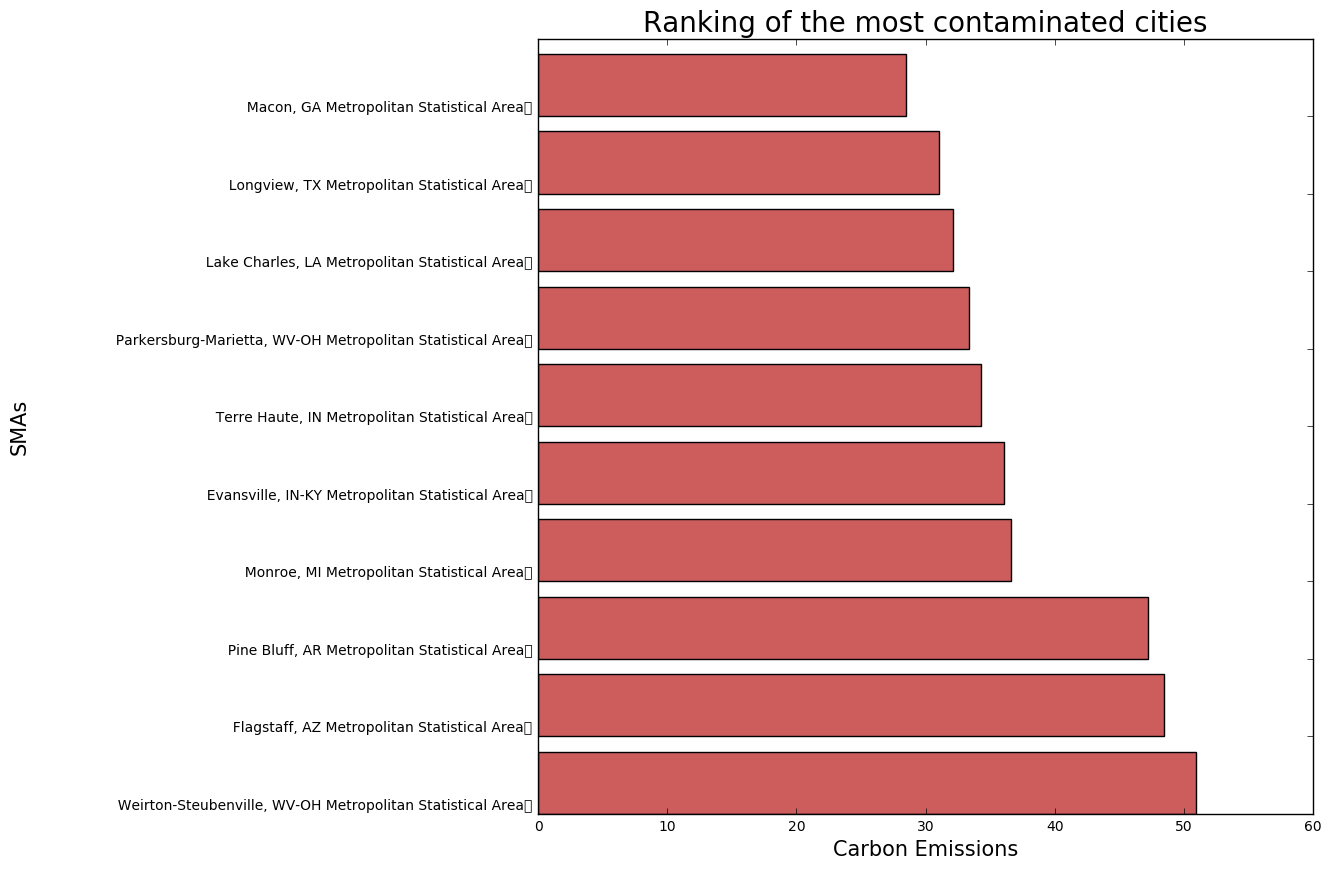

In [37]:
plt.figure(figsize = (10,10))
plt.barh(np.arange(0,10),y, color = 'IndianRed' )
plt.title('Ranking of the most contaminated cities', size = 20)
plt.ylabel('SMAs', size = 15)
plt.xlabel('Carbon Emissions', size = 15)
plt.yticks(np.arange(0,10),x)
plt.show()

In [38]:
z = list(MSA_least['Name of MSAs'].head(10))

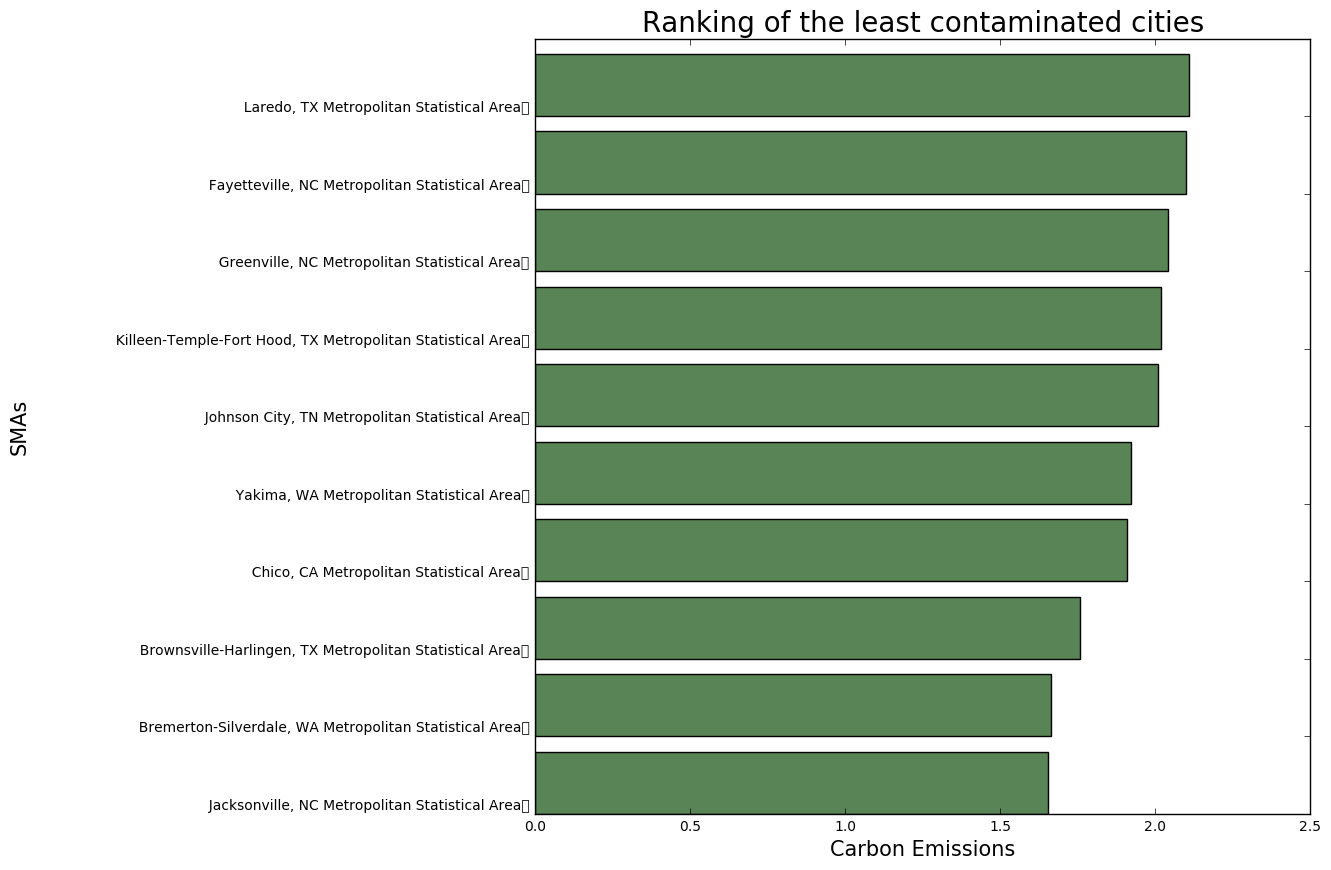

In [39]:
plt.figure(figsize = (10,10))
plt.barh(np.arange(0,10),MSA_least['Total Carbon Emissions'], color = 'darksage')

plt.title('Ranking of the least contaminated cities', size = 20)
plt.ylabel('SMAs', size = 15)
plt.xlabel('Carbon Emissions', size = 15)
plt.yticks(np.arange(0,10),z)

plt.show()

## Scatterplots

In [47]:
MSA_red_norm.columns

Index([                                 u'MSA',
                                       u'Code',
                                   u'Pop 2000',
                                      u'Total',
                                 u'Commercial',
                                 u'Industrial',
                                u'Residential',
                           u'Electricity Prod',
                                     u'Onroad',
                                     u'Cement',
                                   u'Aircraft',
                                    u'Unknown',
                                    u'Nonroad',
                                  u'Transport',
                        u'Total area sq miles',
       u'Density per square mile of land area',
                                   u'MSA_Name',
                                   u'MSA Code',
                                       u'Area',
                                    u'Density'],
      dtype='object')

In [ ]:
MSA_red = MSA_red_norm[[ u'MSA',             u'Code',         u'Pop 2000',
                  u'Total', u'MSA_Name', u'Total area sq miles',
       u'Density per square mile of land area']]

MSA_red.columns = [ u'MSA',             u'Code',         u'Pop_2000',
                  u'Total', u'MSA_Name', 'Area', 'Density']

In [ ]:
#MSA_red.columns = [ u'MSA',             u'Code',         u'Pop_2000',
                  #u'Total',       u'Commercial',       u'Industrial',
            #u'Residential', u'Electricity Prod',           u'Onroad',
                 #u'Cement',         u'Aircraft',          u'Unknown',
                #u'Nonroad',        u'Transport',         u'MSA_Name']

In [ ]:
data = MSA_red.sort('Pop_2000')

In [ ]:
plt.figure(figsize= (10,10))
plt.scatter(data['Pop_2000'],data.Total,c = 'IndianRed')
plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('Carbon Emissions per capita', size = 15)
plt.xlabel('Population Total', size = 15)
plt.show()

Caption 1 : 

In [ ]:
plt.figure(figsize= (10,10))
data['Total_log'] = np.log10(data.Total)
data['Pop_2000_log'] = np.log(data['Pop_2000'])
plt.scatter(data['Pop_2000_log'],data['Total_log'],c = 'IndianRed')
plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('Carbon Emissions per capita', size = 15)
plt.xlabel('Population Total', size = 15)
plt.show()

## Step : Line Fits

In [ ]:
data.columns

In [ ]:
lm1log = smf.ols(formula = 'Total_log ~ Pop_2000_log', data = data).fit()
lm2log = smf.ols(formula = 'Total_log ~ 1 + Pop_2000_log', data = data).fit()
lm3log = smf.ols(formula = 'Total_log ~ 1 + Pop_2000_log+ I(Pop_2000_log**2)', data = data).fit()

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(data.Pop_2000_log,data.Total_log,c = 'IndianRed')

plt.plot(data.Pop_2000_log, lm1log.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
#plt.plot(data.Pop_2000_log, lm2log.predict(), 'Green', label='1-degree poly')
plt.plot(data.Pop_2000_log, lm3log.predict(), 'Gold', label='quadratic line')
plt.legend()

plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('log(Carbon Emissions)', size = 15)
plt.xlabel('log(Population Total)', size = 15)
plt.legend()
plt.show()

In [ ]:
print lm1log.params
print lm3log.params
print 'Correlation coefficient: %f' % (stats.pearsonr(data.Pop_2000_log,data.Total_log)[0])

In [ ]:
lm1 = smf.ols(formula = 'Total ~ Pop_2000', data = data).fit()
lm2 = smf.ols(formula = 'Total ~ 1 + Pop_2000', data = data).fit()
lm3 = smf.ols(formula = 'Total ~ 1 + Pop_2000+ I(Pop_2000**2)', data = data).fit()

In [ ]:
y = lm3.params[0] + lm3.params[1]*x + lm3.params[2]*x**2

In [ ]:
fmin(f,13.5)

In [ ]:
np.exp(13.5)

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(data.Pop_2000,data.Total,c = 'IndianRed')

plt.plot(data.Pop_2000, lm1.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
plt.plot(data.Pop_2000, lm2.predict(), 'Green', label='1-degree poly')
plt.plot(data.Pop_2000, lm3.predict(), 'Gold', label='quadratic line')


plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('Carbon Emissions', size = 15)
plt.xlabel('Population Total', size = 15)
plt.show()

In [ ]:
print lm1.params
print lm3.params
print 'Correlation coefficient: %f' % (stats.pearsonr(data.Pop_2000,data.Total)[0])

In [ ]:
data3 = data[data.Total<40]
data3 = data[data.Pop_2000<3000000]
data3 = data[data.Pop_2000>100]

In [ ]:
lm13 = smf.ols(formula = 'Total ~ Pop_2000', data = data3).fit()
lm23 = smf.ols(formula = 'Total ~ 1 + Pop_2000', data = data3).fit()
lm33 = smf.ols(formula = 'Total ~ 1 + Pop_2000+ I(Pop_2000**2)', data = data3).fit()

In [ ]:
print lm13.params
print lm33.params
print 'Correlation coefficient: %f' % (stats.pearsonr(data3.Pop_2000,data3.Total)[0])

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(data.Pop_2000,data.Total,c = 'IndianRed')

plt.plot(data3.Pop_2000, lm1.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
#plt.plot(data3.Pop_2000, lm2.predict(), 'Green', label='1-degree poly')
plt.plot(data3.Pop_2000, lm3.predict(), 'Gold', label='quadratic line')
plt.legend()


plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('Carbon Emissions', size = 15)
plt.xlabel('Population Total', size = 15)
plt.show()

In [ ]:
print lm13.params
print lm33.params
print 'Correlation coefficient: %f' % (stats.pearsonr(data.Pop_2000,data.Total)[0])

In [ ]:
lm33.params[0]
lm33.params[1]
lm33.params[1]

In [ ]:
x = 2000000

In [ ]:
y = lm33.params[0] + lm33.params[1]*x + lm33.params[2]*x**2
y

In [ ]:
from scipy.optimize import fmin
import math

In [ ]:
def f(x):
    y = lm33.params[0] + lm33.params[1]*x + lm33.params[2]*x**2

In [ ]:
fmin(f,2000000)

In [ ]:
new_data = data

In [ ]:
#new_data = new_data[new_data.Pop_2000<2000000]
#new_data = new_data[new_data.Total<200]

In [ ]:
lm4 = smf.ols(formula = 'Total ~ Pop_2000', data = new_data).fit()
lm5 = smf.ols(formula = 'Total ~ 1 + Pop_2000', data = new_data).fit()
lm6 = smf.ols(formula = 'Total ~ 1 + Pop_2000+ I(Pop_2000**2)', data = new_data).fit()

In [ ]:
print lm4.params
print lm6.params
print 'Correlation coefficient: %f' % (stats.pearsonr(new_data.Pop_2000,new_data.Total)[0])

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(new_data.Pop_2000,new_data.Total,c = 'IndianRed')

plt.plot(new_data.Pop_2000, lm4.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
#plt.plot(new_data.Pop_2000, lm5.predict(), 'Green', label='1-degree poly')
plt.plot(new_data.Pop_2000, lm6.predict(), 'Gold', label='quadratic line')
plt.legend()


plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('Carbon Emissions', size = 15)
plt.xlabel('Population Total', size = 15)
plt.show()

In [ ]:
data2 = MSA_red_norm.sort('Density')

In [ ]:
data2['Total_log'] = np.log10(data2.Total)
data2['Density_log'] = np.log(data2['Density'])

In [ ]:
lm10log = smf.ols(formula = 'Total_log ~ Density_log', data = data2).fit()
lm20log = smf.ols(formula = 'Total_log ~ 1 + Density_log', data = data2).fit()
lm30log = smf.ols(formula = 'Total_log ~ 1 + Density_log+ I(Density_log**2)', data = data2).fit()

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(data2.Density_log,data2.Total_log,c = 'IndianRed')

plt.plot(data2.Density_log, lm10log.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
#plt.plot(data2.Density_log, lm20log.predict(), 'Green', label='1-degree poly')
plt.plot(data2.Density_log, lm30log.predict(), 'Gold', label='quadratic line')

plt.title('Carbon Emission vs Density', size = 20)
plt.ylabel('log(Carbon Emissions per capita)  (ton/pers)', size = 15)
plt.xlabel('log(Density) (pop/mil2)', size = 15)
plt.legend()
plt.show() 

In [ ]:
x =5

In [ ]:
Y = 0.706145 +0.002950* np.log(x) -0.000745 *np.log(x)**2
Y

In [ ]:
print lm10log.params
print lm30log.params
print 'Correlation coefficient: %f' % (stats.pearsonr(data2.Density,data2.Total)[0])

In [ ]:
new_data2 = data2

In [ ]:
lm40 = smf.ols(formula = 'Total ~ Density', data = new_data2).fit()
lm50 = smf.ols(formula = 'Total ~ 1 + Density', data = new_data2).fit()
lm60 = smf.ols(formula = 'Total ~ 1 + Density+ I(Density**2)', data = new_data2).fit()

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(new_data2.Density,new_data2.Total,c = 'IndianRed')

plt.plot(new_data2.Density, lm40.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
#plt.plot(new_data2.Density, lm50.predict(), 'Green', label='1-degree poly')
plt.plot(new_data2.Density, lm60.predict(), 'Gold', label='quadratic line')


plt.title('Carbon Emission vs Density', size = 20)
plt.ylabel('Carbon Emissions(ton/pers)', size = 15)
plt.xlabel('Density(population/mil2)', size = 15)
plt.legend()
plt.show()

In [ ]:
print lm40.params
print lm60.params
print 'Correlation coefficient: %f' % (stats.pearsonr(new_data2.Density,new_data2.Total)[0])